In [ ]:
import pandas as pd 
import re
import jieba 
import nltk

from nltk.corpus import stopwords


FONT_PATH = r'C:\Windows\Fonts\simsun.ttc'
SG_WORDS_RAW_FILEPATH = 'src/sg_words.txt'
SG_WORDS_CLEAN_FILEPATH = 'src/sg_words_clean.txt'

In [57]:
def clean_text(text):
    # 去除HTML标签
    text = re.sub(r'<[^>]+>', '', text)
    
    # 去除网址链接
    text = re.sub(r'http\S+', '', text)
    
    # 去除特殊符号和标点（保留中文和英文句号）
    text = re.sub(r'[^\w\s。.]', '', text)
    
    # 去除表情符号（根据实际情况可能需要定制正则表达式）
    text = re.sub(r'\[.*?\]', '', text)
    
    # 去除空格和换行符
    text = re.sub(r'\s+', ' ', text).strip()
    
    # 去除无意义的数字和单字
    text = re.sub(r'\b\d+\b', '', text)
    text = re.sub(r'\b\w\b', '', text)
    
    return text



In [ ]:
# 读取文件并去重
with open(SG_WORDS_RAW_FILEPATH, 'r', encoding='utf-8') as file:
    unique_lines = set(file.readlines())

# 写回到新文件
with open(SG_WORDS_CLEAN_FILEPATH, 'w', encoding='utf-8') as file:
    file.writelines(sorted(unique_lines))

jieba.load_userdict(SG_WORDS_CLEAN_FILEPATH)

In [58]:
df_cmt1 = pd.read_csv('src/xhs_review_raw_2023-11-06.csv', encoding='utf_8_sig')
df_cmt2 = pd.read_csv('src/xhs_review_raw_2024-02-12.csv', encoding='utf_8_sig')
df_usr1 = pd.read_csv('src/xhs_user_raw_2023-11-06.csv', encoding='utf_8_sig')
df_usr2 = pd.read_csv('src/xhs_user_raw_2024-02-12.csv', encoding='utf_8_sig')

df_cmt = pd.concat([df_cmt1, df_cmt2], ignore_index=True)
df_usr = pd.concat([df_usr1, df_usr2], ignore_index=True)

df_cmt = df_cmt.drop_duplicates(subset='noteid')
print(f"df cmt shape: {df_cmt.shape}")

df_usr = df_usr.drop_duplicates(subset='userid')
print(f"df user shape: {df_usr.shape}")

df_cmt_sample = df_cmt.head()
df_cmt_sample

df cmt shape: (4657, 21)
df user shape: (2686, 10)


,page,note_url,title,noteid,username,userid,create_time,likes,images,comments,...,content,user_intro,user_tags,user_follows,user_followers,user_like_bookmark_total,search_key,create_date,create_dtime,search_keyword
0,1,https://www.xiaohongshu.com/explore/65504eed00...,新加坡攻略-全景区无citywalk,65504eed0000000032035dab,小杨再也不乱买,5a36ffe24eacab23e6760ca2,1699760000000.0,0,4,3,...,【滨海湾花园】推荐指数⭐⭐⭐⭐推荐去，最推荐云雾林！买票的时候可以多几个平台看看，一般都是套...,���������,25岁 湖北武汉,100+,10+,100+,guide,2023-11-06,2023-11-12 11:33:20,NaN
1,1,https://www.xiaohongshu.com/explore/654f7a9600...,邀你开启 �仙人掌惊喜盲盒！,654f7a96000000003203601c,新加坡滨海湾花园,5f2a1cf70000000001008541,1699710000000.0,5,4,0,...,想要在滨海湾花园，拍出热带沙漠氛围感满满的打卡照？✨✨✨步入�仙人掌绿亭（Sun Pavil...,新加坡滨海湾花园官方公众账号，这里有全面的旅行信息，丰富的植物花卉介绍，助您畅游新加坡滨海湾花园。,新加坡,1,100+,100+,guide,2023-11-06,2023-11-11 21:40:00,NaN
2,1,https://www.xiaohongshu.com/explore/654f720f00...,��免费进圣淘沙！给我走sentosa boardwalk,654f720f000000001701eacd,Amio海外旅游领队,61a4d4b5000000001000d236,1699710000000.0,181,10,10+,...,新加坡如果从怡丰城去圣淘沙要4新币坐大巴进去圣淘沙然后想去怡丰城逛街吃饭吃完饭想回圣淘沙发现...,�国内国际导游｜�出境领队 enfp 天秤\r\n�我的工作就是旅游�旅游分享,29岁 浙江杭州,10+,100+,1W+,guide,2023-11-06,2023-11-11 21:40:00,NaN
3,1,https://www.xiaohongshu.com/explore/654f783e00...,新加坡攻略-樟宜机场你可能需要知道的tips,654f783e0000000033009a13,小杨再也不乱买,5a36ffe24eacab23e6760ca2,1699710000000.0,64,1,5,...,刷小红书发现很多樟宜机场的攻略比较零散，亲自跑了一回，想说按照去程和返程把可能需要在樟宜机场...,���������,25岁 湖北武汉,100+,10+,100+,guide,2023-11-06,2023-11-11 21:40:00,NaN
4,1,https://www.xiaohongshu.com/explore/654f959900...,��乌节圣诞大街欢来啦�氛围感拉满,654f95990000000032030968,Lora在漫游,653f696a000000000301c03b,1699710000000.0,10,7,1,...,虽然还有两个月才到圣诞节，但激动的心情已经难以掩饰� 第40个年头的“乌节路大街欢”又要来啦...,✈️旅行｜探店｜美食�\r\n我爱这个丰富多彩的世界�,NaN,2,10+,1K+,guide,2023-11-06,2023-11-11 21:40:00,NaN


In [59]:
# 应用清洗函数
df_cmt_sample['cleaned_content'] = df_cmt_sample['content'].apply(clean_text)

# 查看清洗后的结果
print(df_cmt_sample['content'])
print(df_cmt_sample['cleaned_content'])

0    滨海湾花园推荐指数推荐去最推荐云雾林买票的时候可以多几个平台看看一般都是套票纠结的话买云雾林...
1    想要在滨海湾花园拍出热带沙漠氛围感满满的打卡照步入仙人掌绿亭Sun Pavilion扑面而来...
2    新加坡如果从怡丰城去圣淘沙要4新币坐大巴进去圣淘沙然后想去怡丰城逛街吃饭吃完饭想回圣淘沙发现...
3    刷小红书发现很多樟宜机场的攻略比较零散亲自跑了一回想说按照去程和返程把可能需要在樟宜机场做的...
4    虽然还有两个月才到圣诞节但激动的心情已经难以掩饰 第40个年头的乌节路大街欢又要来啦11  ...
Name: cleaned_content, dtype: object
0    【滨海湾花园】推荐指数⭐⭐⭐⭐推荐去，最推荐云雾林！买票的时候可以多几个平台看看，一般都是套...
1    想要在滨海湾花园，拍出热带沙漠氛围感满满的打卡照？✨✨✨步入�仙人掌绿亭（Sun Pavil...
2    新加坡如果从怡丰城去圣淘沙要4新币坐大巴进去圣淘沙然后想去怡丰城逛街吃饭吃完饭想回圣淘沙发现...
3    刷小红书发现很多樟宜机场的攻略比较零散，亲自跑了一回，想说按照去程和返程把可能需要在樟宜机场...
4    虽然还有两个月才到圣诞节，但激动的心情已经难以掩饰� 第40个年头的“乌节路大街欢”又要来啦...
Name: content, dtype: object


C:\Users\SichengLiu\AppData\Local\Temp\ipykernel_24152\4287424768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cmt_sample['cleaned_content'] = df_cmt_sample['content'].apply(clean_text)


In [60]:

# 分词
df_cmt_sample['cleaned_content'] = df_cmt_sample['cleaned_content'].apply(lambda x: ' '.join(jieba.cut(x)))

# 加载停用词表并去除停用词
# from github https://github.com/stopwords-iso/stopwords-zh
stopwords_mannual = [line.strip() for line in open('src/stopwords-zh.txt', encoding='UTF-8').readlines()]
df_cmt_sample['cleaned_content'] = df_cmt_sample['cleaned_content'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords_mannual))

# from nltk
nltk.download('stopwords')
stopwords_cn_list = stopwords.words('chinese')
df_cmt_sample['cleaned_content'] = df_cmt_sample['cleaned_content'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords_cn_list))

df_cmt_sample['cleaned_content']

C:\Users\SichengLiu\AppData\Local\Temp\ipykernel_24152\1155243745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cmt_sample['cleaned_content'] = df_cmt_sample['cleaned_content'].apply(lambda x: ' '.join(jieba.cut(x)))
C:\Users\SichengLiu\AppData\Local\Temp\ipykernel_24152\1155243745.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cmt_sample['cleaned_content'] = df_cmt_sample['cleaned_content'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords_mannual))
[nltk_data] D

0    滨海湾 花园 推荐 指数 推荐 推荐 云雾 林 买票 几个 平台 套票 纠结 买 云雾 林花...
1    想要 滨海湾 花园 拍 出 热带 沙漠 氛围 感 满满的 打卡 步入 仙人掌 绿亭 Sun ...
2    新加坡 怡丰城 圣淘沙 4 新币 坐 大巴 进去 圣淘沙 想 怡丰城 逛街 吃饭 吃完饭 想...
3    刷小红书 发现 很多 樟宜机场 攻略 零散 亲自 跑 一回 想 去程 返程 樟宜机场 事情 ...
4    两个 圣诞节 激动 心情 难以 掩饰 40 年头 乌节路 大街 欢 11 日起 乌节路 亮灯...
Name: cleaned_content, dtype: object

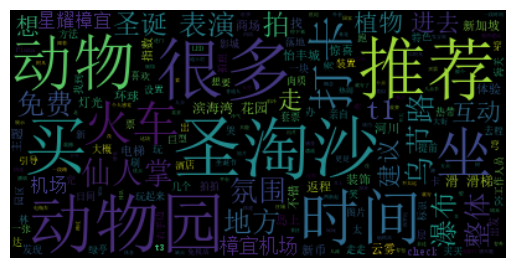

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 生成词云
text = ' '.join(df_cmt_sample['cleaned_content'])
wordcloud = WordCloud(font_path=FONT_PATH).generate(text)

# 显示词云
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [62]:
# df_cmt.to_csv("src/clean_data/xhs_review.csv", mode='a+', index=False, encoding='utf_8_sig')
# df_usr.to_csv("src/clean_data/xhs_user.csv", mode='a+', index=True, encoding='utf_8_sig')